# Visualizing CarMax Trade-Ins

## Import libraries and load data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("../data/viz.csv").drop("Unnamed: 0", axis = 1)

### Check if data loaded properly

In [3]:
data.head() #looks good!

,price,appraisal_offer,make_appraisal,model_appraisal,trim_level_premium_appraisal,model_year_appraisal,mileage_appraisal,engine_appraisal,mpg_city_appraisal,mpg_highway_appraisal,...,mid_size_appraisal,pickup_appraisal,small_suv_appraisal,sports_car_appraisal,van_appraisal,cylinders,cylinders_appraisal,region,color_grouped,color_grouped_appraisal
0,24000,9000,Ford,Escape,True,2012,39300,1.6,22.0,29,...,False,False,True,False,False,6,4,Midwest,Black,White
1,33000,14600,Toyota,Tacoma,True,2014,105800,3.5,19.0,24,...,False,True,False,False,False,6,6,West,Black,Gray
2,25500,3400,Chevrolet,Cruze,False,2008,97300,1.4,28.0,42,...,False,False,False,False,False,4,4,Midwest,Gray,White
3,18700,1100,Chevrolet,Impala,True,2006,145600,3.9,17.0,27,...,False,False,False,False,False,6,6,South,Black,White
4,19500,15000,GMC,Yukon,False,2009,51600,5.3,15.0,21,...,False,False,False,False,False,4,8,West,Red,Black


## First, let's visualize the most popular makes and models (overall and by region)

#### 1. Top 10 most popular makes (overall)

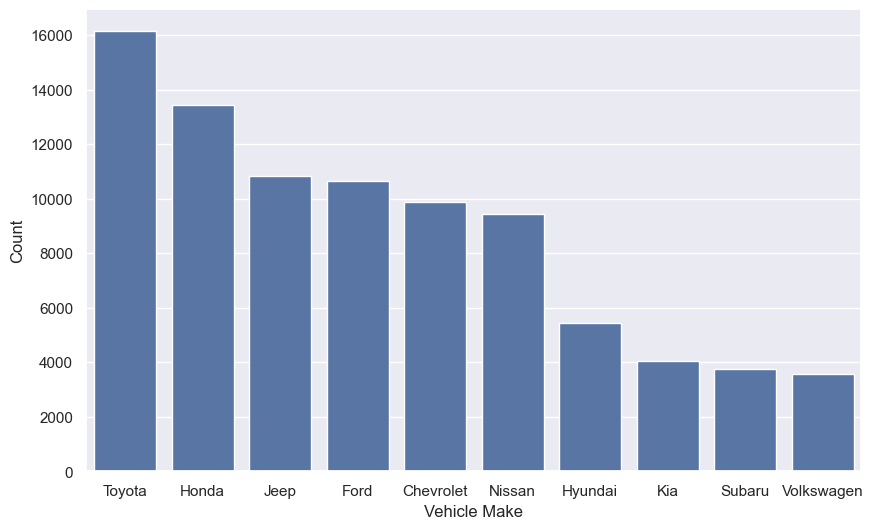

In [34]:
pop_makes = data["make"].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.set(font_scale=1)
ax = sns.barplot(data=pop_makes, x = "make", y = "count")
ax.set_xlabel("Vehicle Make", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()


#### 2. Top 10 most popular models (overall)

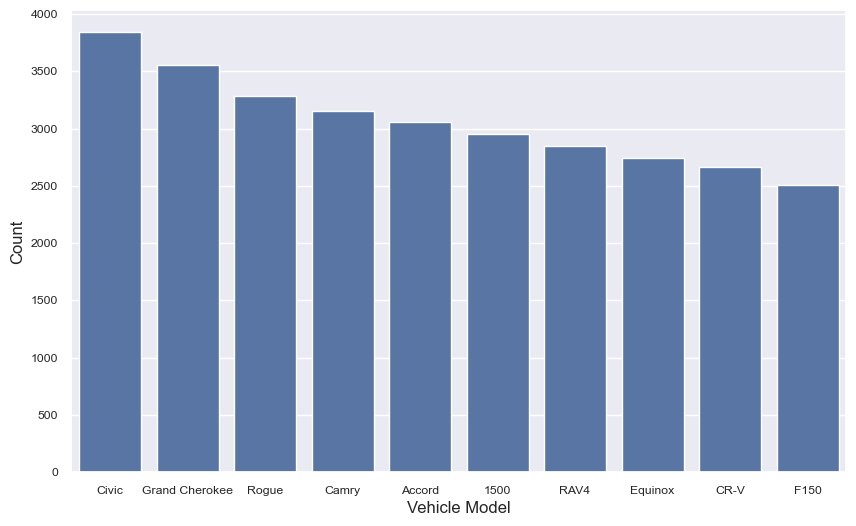

In [37]:
pop_makes = data["model"].value_counts().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
ax = sns.barplot(data=pop_makes, x = "model", y = "count")
ax.set_xlabel("Vehicle Model", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

#### 3. Top makes by region

In [97]:
region_filtered = data[["region", "make"]].groupby("region").value_counts().reset_index()
Midwest = region_filtered[region_filtered["region"]=="Midwest"].sort_values(ascending=False, by="count").head(10)
Northeast = region_filtered[region_filtered["region"]=="Northeast"].sort_values(ascending=False, by="count").head(10)
South = region_filtered[region_filtered["region"]=="South"].sort_values(ascending=False, by="count").head(10)
West = region_filtered[region_filtered["region"]=="West"].sort_values(ascending=False, by="count").head(10)

pop_make_region = pd.concat([Midwest, Northeast, South, West], axis=0).reset_index().drop("index", axis = 1)

pop_make_region.make.unique()

#Used plotly because I couldn't get it to work with seaborn
fig = px.bar(pop_make_region, x="make", y="count", facet_col="region")
fig.update_layout(barmode="stack", xaxis={"categoryorder":"total ascending"})
fig.show()


#### 4. Top models by region

In [99]:
region_filtered = data[["region", "model"]].groupby("region").value_counts().reset_index()
Midwest = region_filtered[region_filtered["region"]=="Midwest"].sort_values(ascending=False, by="count").head(10)
Northeast = region_filtered[region_filtered["region"]=="Northeast"].sort_values(ascending=False, by="count").head(10)
South = region_filtered[region_filtered["region"]=="South"].sort_values(ascending=False, by="count").head(10)
West = region_filtered[region_filtered["region"]=="West"].sort_values(ascending=False, by="count").head(10)

pop_make_region = pd.concat([Midwest, Northeast, South, West], axis=0).reset_index().drop("index", axis = 1)

pop_make_region.model.unique()

fig = px.bar(pop_make_region, x="model", y="count", facet_col="region")
fig.update_layout(barmode="stack", xaxis={"categoryorder":"total ascending"})
fig.show()


## Now, let's look at what features correlate with the appraisal offer and price of a car

#### 1. Price correlation matrix

In [100]:
num_cols = list()
for i in data.columns:
    if data[i].dtype == "int64" or data[i].dtype == "int32" or data[i].dtype == "float64" or data[i].dtype == "float64":
        num_cols.append(i)
    else:
        pass  


appraised_cols = list()
purchased_cols = list()
for i in num_cols:
    if "appraisal" in i:
        appraised_cols.append(i)
    else:
        purchased_cols.append(i)

In [120]:
correlations_purchased = pd.DataFrame(data[purchased_cols].corr())
fig = px.imshow(correlations_purchased, x=correlations_purchased.columns, y=correlations_purchased.index,
                text_auto=True)
fig.update_layout(width=1000,height=600)
fig.show()

In [119]:
correlations_appraisal = pd.DataFrame(data[appraised_cols].corr())
fig = px.imshow(correlations_appraisal, x=correlations_appraisal.columns, y=correlations_appraisal.index, 
                text_auto=True)
fig.update_layout(width=1000,height=600)
fig.show()

In [ ]:
top10_data = bar_data[bar_data["region"] == region][value].value_counts().sort_values(ascending=False).head(10)
fig = px.bar(top10_data, x = value, y = "count")
st.plotly_chart(fig)

In [126]:
top10_data = data[data["region"] == "Midwest"]["make"].value_counts().to_frame().sort_values(by="count",ascending=False).head(10).reset_index()

top10_data

,make,count
0,Jeep,1878
1,Chevrolet,1806
2,Ford,1458
3,Honda,1403
4,Nissan,1175
5,Toyota,1147
6,Hyundai,631
7,Kia,502
8,GMC,438
9,Subaru,413
